In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    print(n)
    
    # y-data for the ECDF: y
    
    y = np.arange(1, n+1) / n

    return x, y


michelson_speed_of_light = [299.85, 299.74, 299.9, 300.07, 299.93, 299.85, 299.95, 299.98, 299.98, 299.88, 300, 299.98, 299.93, 299.65, 299.76, 299.81, 300, 300, 299.96, 299.96, 299.96, 299.94, 299.96, 299.94, 299.88, 299.8, 299.85, 299.88, 299.9, 299.84, 299.83, 299.79, 299.81, 299.88, 299.88, 299.83, 299.8, 299.79, 299.76, 299.8, 299.88, 299.88, 299.88, 299.86, 299.72, 299.72, 299.62, 299.86, 299.97, 299.95, 299.88, 299.91, 299.85, 299.87, 299.84, 299.84, 299.85, 299.84, 299.84, 299.84, 299.89, 299.81, 299.81, 299.82, 299.8, 299.77, 299.76, 299.74, 299.75, 299.76, 299.91, 299.92, 299.89, 299.86, 299.88, 299.72, 299.84, 299.85, 299.85, 299.78, 299.89, 299.84, 299.78, 299.81, 299.76, 299.81, 299.79, 299.81, 299.82, 299.85, 299.87, 299.87, 299.81, 299.74, 299.81, 299.94, 299.95, 299.8, 299.81, 299.87]

## Probability density function (PDF)

Continuous analog to the PMF  
Mathematical description of relative likelihood of observing a value of a continuous variable

### Normal distribution

Describes a continuous variable whose PDF has single symmetric peak  

Mean of normal distribution - center of the peak  
Standard deviation of normal distribution - width of the peak  

### Checking normality

100
10000


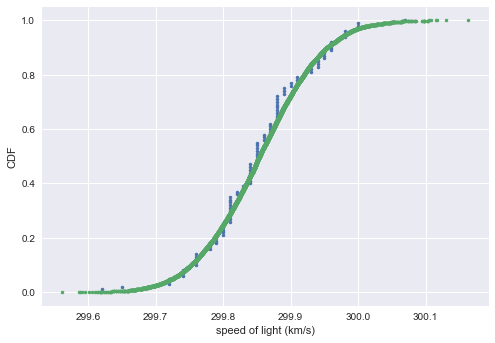

In [2]:
import numpy as np
mean = np.mean(michelson_speed_of_light) 
std = np.std(michelson_speed_of_light) 
samples = np.random.normal(mean, std, size=10000) 
x, y = ecdf(michelson_speed_of_light) 
x_theor, y_theor = ecdf(samples) 

import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.plot(x_theor, y_theor, marker = '.', linestyle = 'none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

### Normal distribution PDF
Probability equals percentage of area under a curve

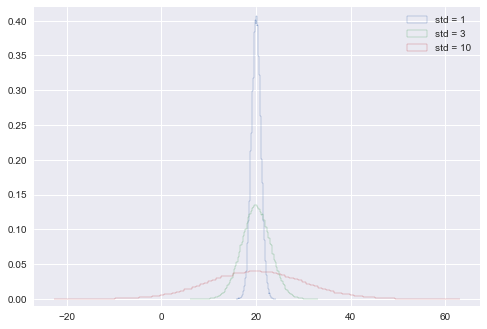

In [3]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)



# Make histograms
plt.hist(samples_std1, bins = 100, normed = True, histtype = 'step')
plt.hist(samples_std3, bins = 100,  normed = True, histtype = 'step')
plt.hist(samples_std10, bins = 100,  normed = True, histtype = 'step')



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### Normal distribution CDF

100000
100000
100000


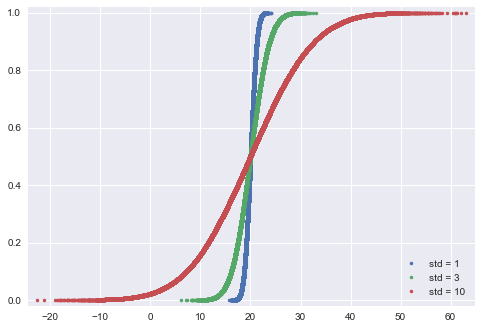

In [4]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)



# Plot CDFs
plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')


# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### Exponential distribution

The waiting time between arrivals of a Poisson
process is Exponentially distributed

In [5]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

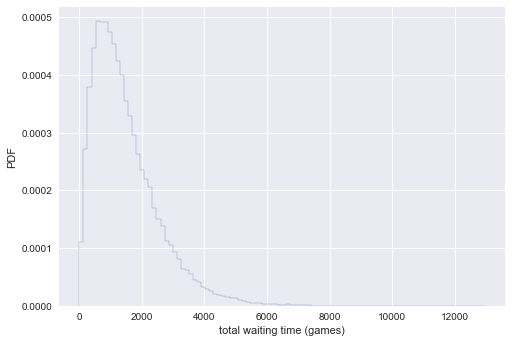

In [6]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
